#### EDA

In [1]:
from ipyleaflet import * 
import pandas as pd
import seaborn as sns
import scipy as sp
import sklearn as sk
import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pylab as plt
import numpy as np
import scipy as sp
import sklearn as sk
mpl.use('Agg')
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')

C:\Users\ledes\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\ledes\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\ledes\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\ledes\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\ledes\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\ledes\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "C:\U

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [5]:
#train data set check
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [ ]:
train = train_raw.iloc[ : 100, : ]
train.tail()

loc  = [(latitude, longitude)] # 이 순서대로 작성할 것.

In [6]:
#test data set check
test.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null object
dropoff_datetime      1458644 non-null object
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625134 entries, 0 to 625133
Data columns (total 9 columns):
id                    625134 non-null object
vendor_id             625134 non-null int64
pickup_datetime       625134 non-null object
passenger_count       625134 non-null int64
pickup_longitude      625134 non-null float64
pickup_latitude       625134 non-null float64
dropoff_longitude     625134 non-null float64
dropoff_latitude      625134 non-null float64
store_and_fwd_flag    625134 non-null object
dtypes: float64(4), int64(2), object(3)
memory usage: 42.9+ MB


In [7]:
train.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [8]:
test.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
dtype: int64

#### Comments :
- check NULL value are clean

In [ ]:
#소수점 3자리까지 절삭(약 130m 단위)
pick_up_longitude = round(train["pickup_longitude"][ : 500], 3)
pick_up_latitude = round(train["pickup_latitude"][ : 500], 3)

In [ ]:
locs = list(zip(pick_up_latitude, pick_up_longitude))  

In [ ]:
center = (40.749756, -73.975418)
zoom = 13
m = Map(center = center, zoom = zoom)

In [ ]:
for loc in locs :
    marker = Marker(location = loc)
    m += marker
    time.sleep(0.5)
m

In [ ]:
dc = DrawControl(circle={'shapeOptions':{'color':'#0000FF'}}, rectangle={'shapeOptions':{'color':'#0000FF'}})
m.add_control(dc)

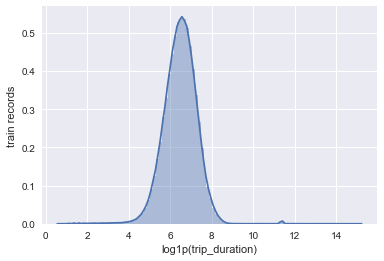

In [9]:
train['log_trip_duration'] = np.log1p(train['trip_duration'])
sns.distplot(train['log_trip_duration'].values, bins=100)
plt.xlabel('log1p(trip_duration)')
plt.ylabel('train records')
plt.show()

#### Comments :
- change y into log for two reasons.
> 1. Evaluation method, RMSLE use log(y)
> 2. it is impossible for us to take a look distribution of y values because of outliers
> in this case, log make it easier to distribution

너무 세세하게 표현되어 있음

소수 셋째 자리까지 변화시켜도 특별한 뭔가를 찾을 수 없었음
-> 특별하게 많이 타는 곳이 있는지 알아보자

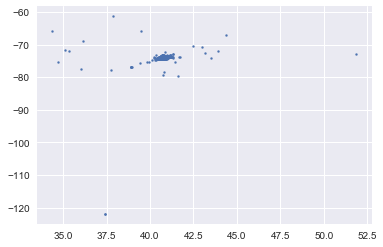

In [22]:
#check where they pick up and dropoff with jointplot
plt.scatter(x = "pickup_latitude", y = "pickup_longitude", data = train, s = 4)
plt.show()

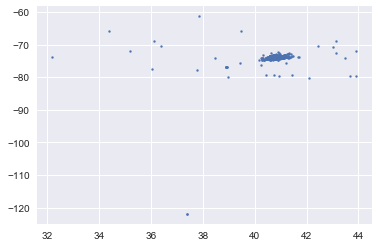

In [23]:
plt.scatter(x = "dropoff_latitude", y = "dropoff_longitude", data = train, s = 4)
plt.show()

#### Comment : 
- It seems like most of them pick up and drop off at same place

In [ ]:
#Tried to check where they go and come, but it filed because of too many points
def where_you_going(n) :
    """ check before using it!!
    from ipyleaflet import * 
    import time
    """
    info = train_raw.iloc[n]
    print(info)
    pickup_longitude = info.iloc[5]
    pickup_latitude = info.iloc[6]
    pickup_point = (pickup_latitude, pickup_longitude)

    dropoff_longitude = info.iloc[7]
    dropoff_latitude = info.iloc[8]
    dropoff_point = (dropoff_latitude, dropoff_longitude)
    zoom = 12
    center = (40.766779, -73.974452)

    ls = [pickup_point, dropoff_point]
    mapping = Map(center = center, zoom = zoom)
    for loc in ls : 
        marker = Marker(location = loc)
        mapping += marker
    
    return mapping
    
    

In [ ]:
#tried to use Google API as well, but it failed because of limit usages
pickup_coordinates = list(zip(datas.pickup_latitude, datas.pickup_longitude))
print(pickup_address[0])

import googlemaps

gmaps = googlemaps.Client(key = "##")

pickup_address = []
for loc in pickup_coordinates :
    sample = gmaps.reverse_geocode(loc)
    result = sample[0].get("formatted_address")
    pickup_address.append(result)
    if len(pickup_address) == 1 :
        break



post_number = []
for idx, value in enumerate(pickup_address) : 
    number = value.split(",")
    post_number.append(number)
print(post_number[:10])

In [ ]:
#시간에 따른 요일 파악 가능
date = parser.parse("2016-03-14 17:24:55")
date.strftime('%A')

시간에 따른 요일을 알아낼 수 있다.

### Step for Pandas time series
change data type from any type to ** datetime **   
set index as ** DatetimeIndex type **

#### we can do these things with time series
1. Resampling method(change time period easily)
    - resample
    - asfreq
2. move period
    - shift
    - tshift
3. Indexing for choose particular data
  ex) df["2016-03-20"] -> get only 20.03.16 data.

4. make date to only Weekday, Weekend, Month, Hour

시계열 분석 시, 미국 시간으로 되어있는 로우 데이터에 시간을 코딩하게 될 경우 우리나라 시간 기준으로 바뀌지 않을까?
바뀐다면 어떻게 미국으로 다시 바꿔줘야 하나?

In [29]:
pd.Series(train["pickup_datetime"][0])

0    2016-03-14 17:24:55
dtype: object

In [37]:
df = pd.DataFrame(train["trip_duration"])
index = train["pickup_datetime"]
index = pd.to_datetime(index)
df = df.set_index(index)
weekly_duration = df.resample("w").mean()

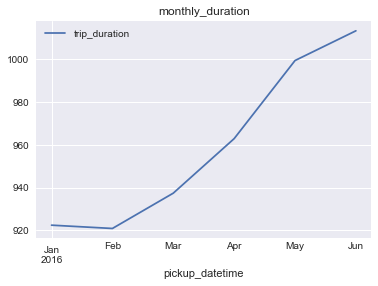

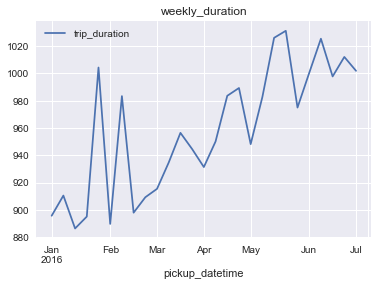

In [42]:
monthly_duration.plot()
plt.title("monthly_duration")

weekly_duration.plot()
plt.title("weekly_duration")

plt.show()

미국과 한국은 같은 북반구에 있으므로 계절의 변화가 같음. = 2월 앞뒤로 trip_duration 이 급증 후 규칙적으로 오르락 내리락, 결과적으로 증가

### 2/12일 오늘의 EDA
1. 불필요한 코드 및 커널 제거
2. 나름대로 아웃라이어 제거한 후, EDA 재시작 할 것.
3. 시간 상 교통량 변화 체크

In [44]:
#문수님이 말한 그 '4놈'인 듯. 제거해보자.
condition = train["trip_duration"] < 1500000
train = train[condition].reset_index(drop = True)

In [45]:
#passenger_count 0명 제거
condition = train["passenger_count"] >= 1
train = train[condition].reset_index(drop = True)

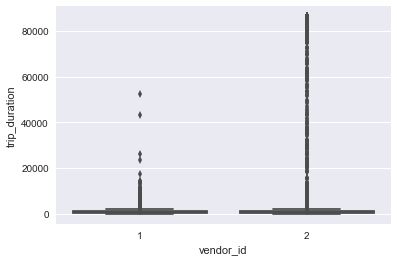

In [47]:
sns.boxplot(y = train["trip_duration"],  x = train["vendor_id"], data = train)
plt.show()

1500000초 이상의 아웃라이어들을 제거했음에도 불구하고, 만 단위의 value들로 박스가 보이지 않음 (하루 = 60 x 60 x 24)

임의로 trip_duration < 3600 데이터들만 골라내서 boxplot 해보자 

In [49]:
condition = train["trip_duration"] < 3600
train = train[condition].reset_index(drop = True)

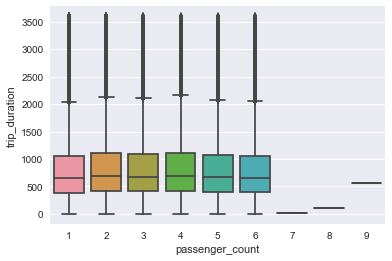

In [50]:
sns.boxplot(y = train["trip_duration"], x = train["passenger_count"], data = train)

In [51]:
#passenger_count 7,8,9 개수 파악
train[(train["passenger_count"] == 7) | (train["passenger_count"] == 8) | (train["passenger_count"] == 9)]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,log_trip_duration
429683,id3280610,2,2016-06-07 10:06:24,2016-06-07 10:06:43,7,-74.173668,40.737274,-74.173660,40.737297,N,19,2.995732
432401,id2489742,2,2016-06-24 08:09:21,2016-06-24 08:18:41,9,-73.710632,40.671581,-73.710632,40.671581,N,560,6.329721
485521,id0506488,2,2016-05-08 22:39:08,2016-05-08 22:39:23,7,-74.039482,40.715031,-74.039482,40.715019,N,15,2.772589
817943,id0988237,2,2016-04-23 19:46:08,2016-04-23 19:46:33,7,-73.631149,40.768551,-73.631149,40.768551,N,25,3.258097
819095,id1488553,2,2016-01-01 01:15:20,2016-01-01 01:17:04,8,-73.992653,40.768719,-74.041374,40.729954,N,104,4.653960


In [53]:
train = train[train["passenger_count"] < 7].reset_index(drop = True)